 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [153]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [154]:
# Reading whale returns
whale_returns_path = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
whale_returns=pd.read_csv(whale_returns_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_returns.sort_index(inplace=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [155]:
#check for data types
whale_returns.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [156]:
# Count nulls
# YOUR CODE HERE
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [157]:
# Drop nulls
# YOUR CODE HERE
whale_returns.dropna(inplace=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [158]:
# Reading algorithmic returns
algo_returns_path = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_returns=pd.read_csv(algo_returns_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_returns.sort_index(inplace=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [159]:
#check for data types
algo_returns.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

In [160]:
# Count nulls
# YOUR CODE HERE
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [161]:
# Drop nulls
# YOUR CODE HERE
algo_returns.dropna(inplace=True)
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [162]:

algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [163]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_path = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_history=pd.read_csv(sp500_history_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_history.sort_index(inplace=True)
sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [164]:
# Check Data Types
# YOUR CODE HERE
sp500_history.dtypes

Close    object
dtype: object

In [165]:
# Fix Data Types
# YOUR CODE HERE
sp500_history['Close']=sp500_history['Close'].str.replace('$','')
sp500_history['Close']=sp500_history['Close'].astype(float)
sp500_history.dtypes

Close    float64
dtype: object

In [166]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_history['Close']=sp500_history['Close'].pct_change()
sp500_history.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [167]:
#checking for nulls
sp500_history.isnull().sum()

Close    1
dtype: int64

In [168]:
# Drop nulls
# YOUR CODE HERE
sp500_history.dropna(inplace=True)
sp500_history.isnull().sum()

Close    0
dtype: int64

In [169]:
# Rename Column
# YOUR CODE HERE
columns=['S&P 500']
sp500_history.columns=columns
sp500_history.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [170]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
all_daily_returns=pd.concat([whale_returns,algo_returns,sp500_history],axis='columns',join='inner')
all_daily_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

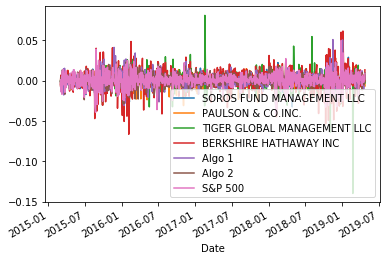

In [171]:
# Plot daily returns
# YOUR CODE HERE
all_daily_returns.plot()

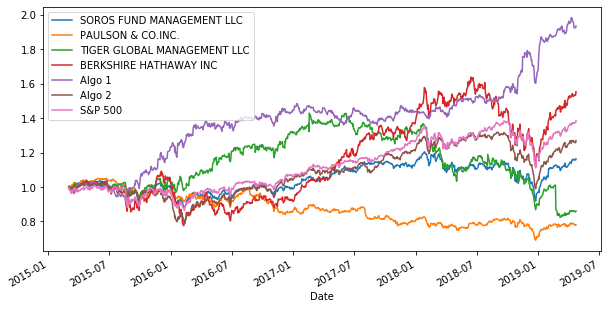

In [172]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + all_daily_returns).cumprod()
cumulative_returns.plot(figsize=(10,5))

Does any portfolio outperform the S&P 500?
Based om the graph we can see that at the latest year (2019)  BERKSHIRE HATHAWAY INC and Algo 1 outperform S&P 500 in the earlier years TIGER GLOBAL MANAGEMENT LLC was also performing better than S&P 500. 

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

SOROS FUND MANAGEMENT LLC         AxesSubplot(0.125,0.125;0.0945122x0.755)
PAULSON & CO.INC.              AxesSubplot(0.238415,0.125;0.0945122x0.755)
TIGER GLOBAL MANAGEMENT LLC    AxesSubplot(0.351829,0.125;0.0945122x0.755)
BERKSHIRE HATHAWAY INC         AxesSubplot(0.465244,0.125;0.0945122x0.755)
Algo 1                         AxesSubplot(0.578659,0.125;0.0945122x0.755)
Algo 2                         AxesSubplot(0.692073,0.125;0.0945122x0.755)
S&P 500                        AxesSubplot(0.805488,0.125;0.0945122x0.755)
dtype: object

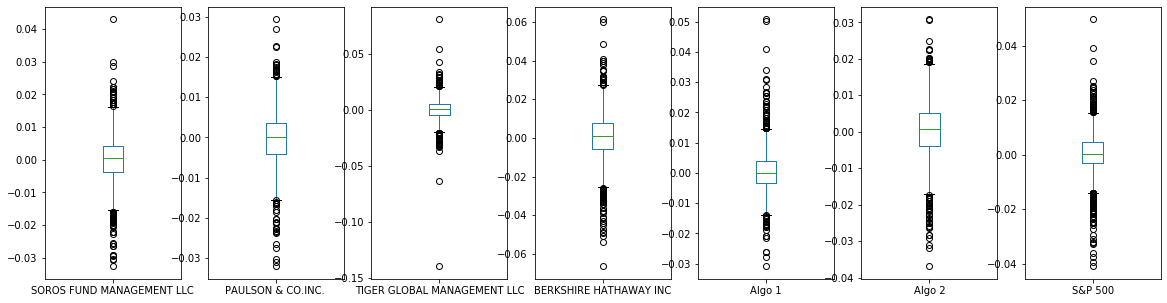

In [173]:
# Box plot to visually show risk
# YOUR CODE HERE
all_daily_returns.plot.box(figsize=(20,5),subplots=True)

Which box has the largest spread?
TIGER GLOBAL MANAGEMENT LLC 
Which has the smallest spread?
PAULSON & CO.INC. 

In [174]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# YOUR CODE HERE
all_portfolio_std = all_daily_returns.std()
all_portfolio_std = all_portfolio_std.sort_values(ascending=False)
all_portfolio_std

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
S&P 500                        0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

Which portfolios are riskier than the S&P 500?
BERKSHIRE HATHAWAY INC and TIGER GLOBAL MANAGEMENT LLC are riskier than the S&P 500.

In [175]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annualized_std =all_portfolio_std * np.sqrt(252)
annualized_std

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
S&P 500                        0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

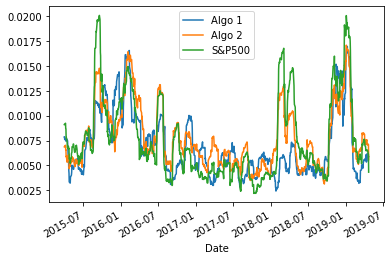

In [176]:
#Plot the rolling standard deviation of the firm's portfolios along with the rolling standard deviation of the S&P 500.
rolling_std_algo1=all_daily_returns['Algo 1'].rolling(window=21).std()
rolling_std_algo2=all_daily_returns['Algo 2'].rolling(window=21).std()
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
rolling_std_sp500=all_daily_returns['S&P 500'].rolling(window=21).std()
ax=rolling_std_algo1.plot()
rolling_std_algo2.plot(ax=ax)
rolling_std_sp500.plot(ax=ax)
ax.legend(['Algo 1','Algo 2','S&P500']);


 Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
yes! based on the above graph you can cearly see that every time there is a spike in the green graph (S&P500)
there is a spike in the other 2 which are Algo 1 and 2. same for the lowes.


In [177]:
# Correlation
# YOUR CODE HERE
correlation=all_daily_returns.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


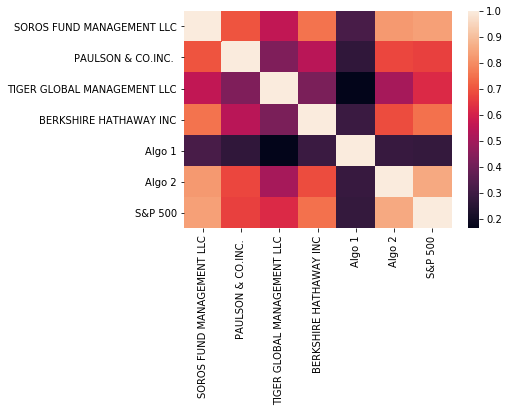

In [178]:
sns.heatmap(correlation)

The portfolios that may mimick the S&P 500 the best in descending order are: Algo 2, SOROS FUND, BERKSHIRE HATHAWAY, PAULSON & CO,TIGER GLOBAL. They all have a correlation above 0.5 with S&P 500 which is a strong correlation.

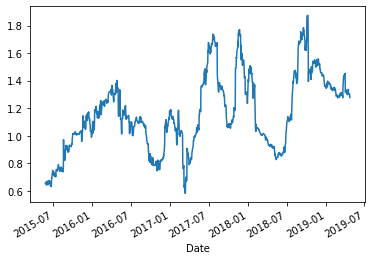

In [179]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# YOUR CODE HERE
covariance = all_daily_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(all_daily_returns['S&P 500'])
variance = all_daily_returns['S&P 500'].rolling(window=60).var()
bh_beta_60days = covariance / variance
bh_beta_60days.plot()

Does the portfolio seem sensitive to movements in the S&P 500? 
yes.

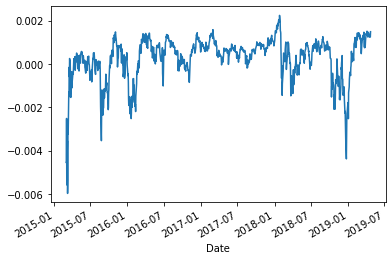

In [180]:
# (OPTIONAL) YOUR CODE HERE
ewm_sp500=all_daily_returns['S&P 500'].ewm(halflife=21).mean()
ewm_sp500.plot()

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [181]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (all_daily_returns.mean() * 252) / (all_portfolio_std * np.sqrt(252))
sharpe_ratios.sort_values(ascending=False)

Algo 1                         1.378648
S&P 500                        0.648267
BERKSHIRE HATHAWAY INC         0.621810
Algo 2                         0.501364
SOROS FUND MANAGEMENT LLC      0.356417
TIGER GLOBAL MANAGEMENT LLC   -0.121060
PAULSON & CO.INC.             -0.483570
dtype: float64

Algo 1  has the best performance

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

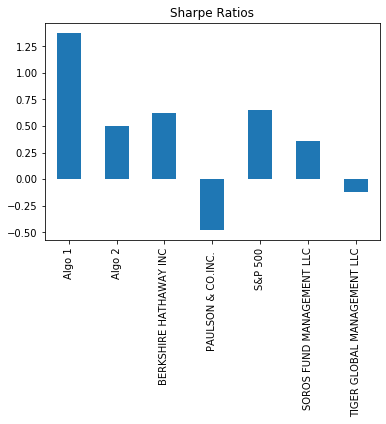

In [182]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot.bar(title='Sharpe Ratios')

Overall yes. but BERKSHIRE HATHAWAY INC and S&P500 are performing better than Algo2.

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [183]:
# Read the first stock
# YOUR CODE HERE
teva_path=Path("Resources/TEVA.csv")
teva_df=pd.read_csv(teva_path, parse_dates=True, infer_datetime_format=True)
teva_df['Date'] = pd.to_datetime(teva_df['Date']).dt.date
teva_df.set_index(teva_df['Date'],inplace=True)
teva_df.drop(columns=['Date'],inplace=True)
teva_df.head()

,Close
Date,
2015-01-02,56.22
2015-01-05,55.09
2015-01-06,54.93
2015-01-07,57.22
2015-01-08,57.60


In [184]:
# Read the second stock
# YOUR CODE HERE
tm_path=Path("Resources/TM.csv")
tm_df=pd.read_csv(tm_path, parse_dates=True, infer_datetime_format=True)
tm_df['Date'] = pd.to_datetime(tm_df['Date']).dt.date
tm_df.set_index(tm_df['Date'],inplace=True)
tm_df.drop(columns=['Date'],inplace=True)
tm_df.head()

,Close
Date,
2015-01-02,125.67
2015-01-05,123.37
2015-01-06,122.10
2015-01-07,125.17
2015-01-08,127.58


In [185]:
# Read the third stock
# YOUR CODE HERE
dis_path=Path("Resources/DIS.csv")
dis_df=pd.read_csv(dis_path, parse_dates=True, infer_datetime_format=True)
dis_df['Date'] = pd.to_datetime(dis_df['Date']).dt.date
dis_df.set_index(dis_df['Date'],inplace=True)
dis_df.drop(columns=['Date'],inplace=True)
dis_df.head()

,Close
Date,
2015-01-02,93.75
2015-01-05,92.38
2015-01-06,91.89
2015-01-07,92.83
2015-01-08,93.79


In [186]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
my_protfolio=pd.concat([teva_df,tm_df,dis_df],axis="columns",join="inner")
my_protfolio.columns=['TEVA','TM','DIS']
my_protfolio

,TEVA,TM,DIS
Date,,,
2015-01-02,56.22,125.67,93.75
2015-01-05,55.09,123.37,92.38
2015-01-06,54.93,122.10,91.89
2015-01-07,57.22,125.17,92.83
2015-01-08,57.60,127.58,93.79
...,...,...,...
2018-12-24,14.59,111.81,100.35
2018-12-26,15.82,113.72,105.83
2018-12-27,15.64,115.48,106.52


In [187]:
# Reset the index
# YOUR CODE HERE
my_protfolio.sort_index(inplace=True)

In [188]:
# Drop Nulls + calaculating daily returns for my protfolio.
# YOUR CODE HERE
my_daily_returns=my_protfolio.pct_change()
my_daily_returns.dropna(inplace=True)
my_daily_returns

,TEVA,TM,DIS
Date,,,
2015-01-05,-0.020100,-0.018302,-0.014613
2015-01-06,-0.002904,-0.010294,-0.005304
2015-01-07,0.041689,0.025143,0.010230
2015-01-08,0.006641,0.019254,0.010341
2015-01-09,-0.015278,-0.011757,0.004905
...,...,...,...
2018-12-24,-0.033775,-0.018866,-0.037133
2018-12-26,0.084304,0.017083,0.054609
2018-12-27,-0.011378,0.015477,0.006520


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [189]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
weighted_returns =my_daily_returns.dot(weights)
weighted_returns

Date
2015-01-05   -0.017672
2015-01-06   -0.006168
2015-01-07    0.025687
2015-01-08    0.012079
2015-01-09   -0.007377
                ...   
2018-12-24   -0.029925
2018-12-26    0.051999
2018-12-27    0.003539
2018-12-28    0.005989
2018-12-31    0.000819
Length: 1005, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [190]:
# YOUR CODE HERE
combined_df=pd.concat([all_daily_returns,my_daily_returns],axis='columns',join='inner')
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,TEVA,TM,DIS
Date,,,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,-0.012246,-0.003459,0.004344
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,0.001771,0.000886,-0.007334
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,-0.000884,-0.004575,-0.005115
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.001947,-0.000074,-0.011521
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.006915,0.003707,0.013870


In [191]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
combined_df.dropna(inplace=True)


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

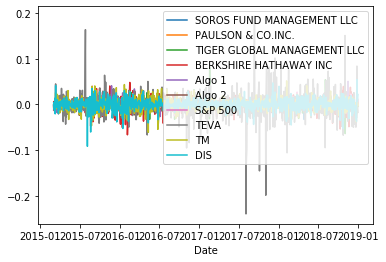

In [192]:
# performance
# Plot daily returns
combined_df.plot()

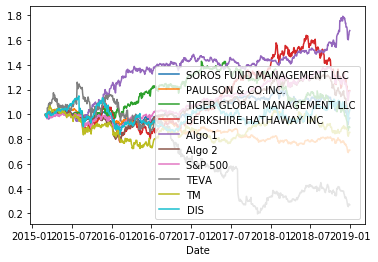

In [193]:
# Plot cumulative returns
cumulative_return_combined=(1+combined_df).cumprod()
cumulative_return_combined.plot()

In [195]:
# Risk

SOROS FUND MANAGEMENT LLC         AxesSubplot(0.125,0.125;0.065678x0.755)
PAULSON & CO.INC.              AxesSubplot(0.203814,0.125;0.065678x0.755)
TIGER GLOBAL MANAGEMENT LLC    AxesSubplot(0.282627,0.125;0.065678x0.755)
BERKSHIRE HATHAWAY INC         AxesSubplot(0.361441,0.125;0.065678x0.755)
Algo 1                         AxesSubplot(0.440254,0.125;0.065678x0.755)
Algo 2                         AxesSubplot(0.519068,0.125;0.065678x0.755)
S&P 500                        AxesSubplot(0.597881,0.125;0.065678x0.755)
TEVA                           AxesSubplot(0.676695,0.125;0.065678x0.755)
TM                             AxesSubplot(0.755508,0.125;0.065678x0.755)
DIS                            AxesSubplot(0.834322,0.125;0.065678x0.755)
dtype: object

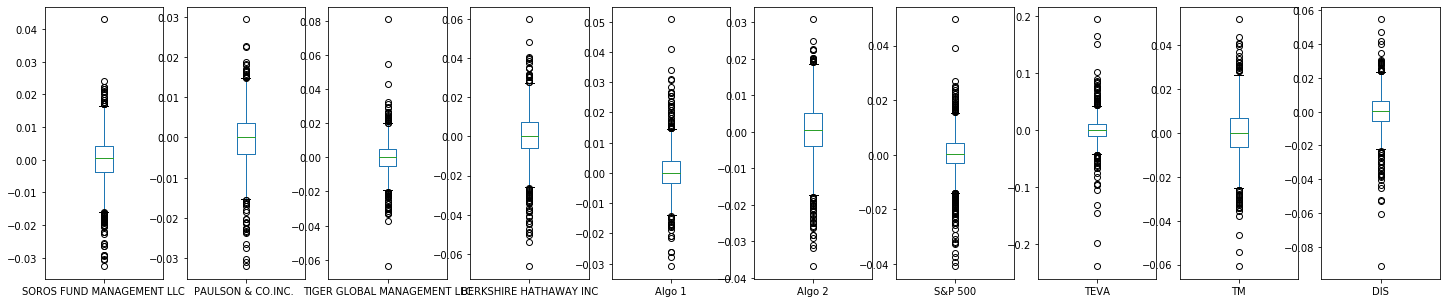

In [196]:
#box plot for each protfolio
combined_df.plot.box(figsize=(25,5),subplots=True)

In [197]:
#Calculate the standard deviation for all portfolios
combined_std=combined_df.std().sort_values(ascending=False)
combined_std

TEVA                           0.026853
BERKSHIRE HATHAWAY INC         0.012904
TM                             0.012156
DIS                            0.011936
TIGER GLOBAL MANAGEMENT LLC    0.010107
S&P 500                        0.008597
Algo 2                         0.008358
SOROS FUND MANAGEMENT LLC      0.007908
Algo 1                         0.007586
PAULSON & CO.INC.              0.007008
dtype: float64

Determine which portfolios are riskier than the S&P 500
Based only on the std TEVA,BERKSHIRE HATHAWAY INC,TM,DIS,TIGER GLOBAL MANAGEMENT LLC are riskier.

In [210]:
#Calculate the Annualized Standard Deviation
annual_std_combined=combined_std*np.sqrt(252)
annual_std_combined

TEVA                           0.426282
BERKSHIRE HATHAWAY INC         0.204849
TM                             0.192970
DIS                            0.189482
TIGER GLOBAL MANAGEMENT LLC    0.160444
S&P 500                        0.136478
Algo 2                         0.132679
SOROS FUND MANAGEMENT LLC      0.125532
Algo 1                         0.120431
PAULSON & CO.INC.              0.111243
dtype: float64

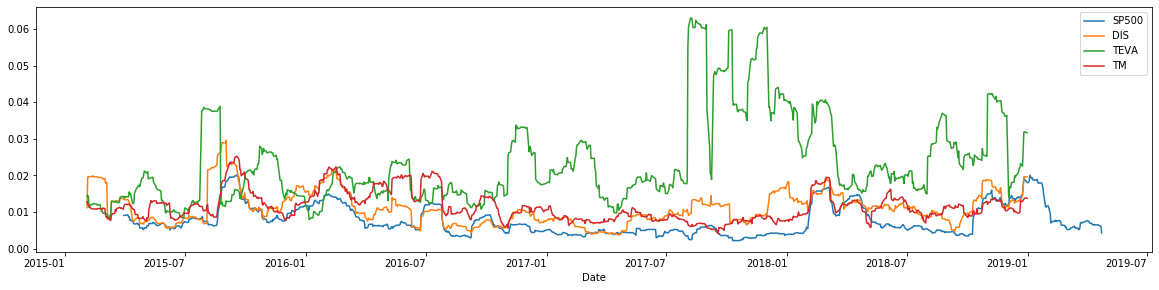

In [201]:
# Rolling
# YOUR CODE HERE
rolling_std_teva=my_daily_returns['TEVA'].rolling(window=21).std()
rolling_std_tM=my_daily_returns['TM'].rolling(window=21).std()
rolling_std_dis=my_daily_returns['DIS'].rolling(window=21).std()
ax=rolling_std_sp500.plot(figsize=(20,5))
rolling_std_dis.plot(ax=ax)
rolling_std_teva.plot(ax=ax)
rolling_std_tM.plot(ax=ax)
ax.legend(['SP500','DIS','TEVA','TM'])

 Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
 not necessarily.

In [206]:
# Beta- I choose to calculate beta for TM and sp500
# YOUR CODE HERE
covaraince_tm = combined_df['TM'].rolling(window=60).cov(combined_df['S&P 500'])
variance_tm = combined_df['S&P 500'].rolling(window=60).var()
beta_tm = covaraince_tm/variance_tm
beta_tm

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2018-12-24    0.605975
2018-12-26    0.555317
2018-12-27    0.563196
2018-12-28    0.562835
2018-12-31    0.562719
Length: 966, dtype: float64

In [207]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
sharpe_ratio_combined=(combined_df.mean()*252) / (annual_std_combined)
sharpe_ratio_combined.sort_values(ascending=False)

Algo 1                         1.178831
S&P 500                        0.391103
BERKSHIRE HATHAWAY INC         0.325599
DIS                            0.143324
Algo 2                         0.140793
SOROS FUND MANAGEMENT LLC      0.000127
TIGER GLOBAL MANAGEMENT LLC   -0.099093
TM                            -0.116260
TEVA                          -0.584434
PAULSON & CO.INC.             -0.744129
dtype: float64

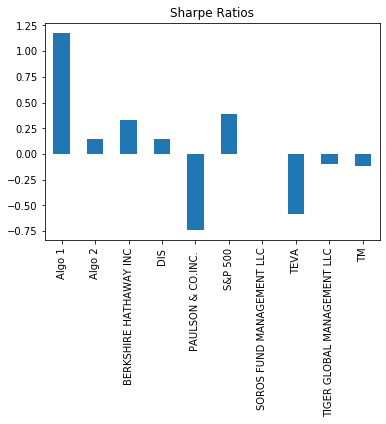

In [209]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratio_combined.plot.bar(title='Sharpe Ratios')

## Include correlation analysis to determine which stocks (if any) are correlated

In [132]:
# YOUR CODE HERE
combined_correlation=combined_df.corr()
combined_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,TEVA,TM,DIS
SOROS FUND MANAGEMENT LLC,1.000000,0.695619,0.605041,0.754396,0.335722,0.827702,0.840711,0.339329,0.532319,0.547486
PAULSON & CO.INC.,0.695619,1.000000,0.468031,0.540224,0.267174,0.671442,0.668202,0.576626,0.411214,0.449422
TIGER GLOBAL MANAGEMENT LLC,0.605041,0.468031,1.000000,0.476361,0.184670,0.563004,0.691013,0.218122,0.464198,0.468812
BERKSHIRE HATHAWAY INC,0.754396,0.540224,0.476361,1.000000,0.306683,0.682083,0.741983,0.239967,0.486126,0.457628
Algo 1,0.335722,0.267174,0.184670,0.306683,1.000000,0.289346,0.292635,0.155005,0.195684,0.185000
Algo 2,0.827702,0.671442,0.563004,0.682083,0.289346,1.000000,0.858790,0.337106,0.535663,0.541690
S&P 500,0.840711,0.668202,0.691013,0.741983,0.292635,0.858790,1.000000,0.331945,0.633977,0.624249
TEVA,0.339329,0.576626,0.218122,0.239967,0.155005,0.337106,0.331945,1.000000,0.203797,0.243470
TM,0.532319,0.411214,0.464198,0.486126,0.195684,0.535663,0.633977,0.203797,1.000000,0.427232
DIS,0.547486,0.449422,0.468812,0.457628,0.185000,0.541690,0.624249,0.243470,0.427232,1.000000


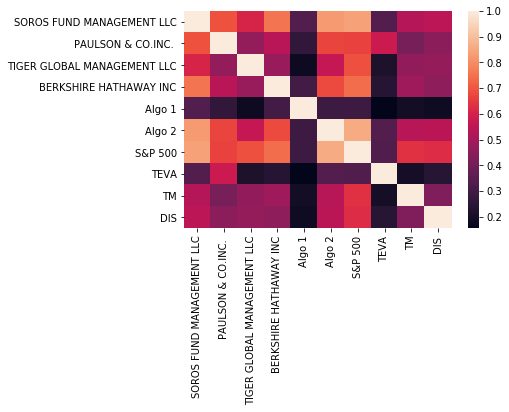

In [136]:
sns.heatmap(combined_correlation)

from the my protfolio only DIS and TM are correlated to S&P500.based on the fact that the correlation is above 0.5.
for the other protfolios its explained above.

 How does your portfolio fair?
  honestly? not so good....